In [5]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm, trange
import torch.nn as nn 
from torch.optim import Adam 
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST

np.random.seed(0)
torch.manual_seed(0)

# architecture

![Alt text](https://viso.ai/wp-content/uploads/2021/09/vision-transformer-vit.png)

# Code

In [8]:
# image
IMAGE_LOC = '/Users/anupam/Documents/code/ai/sam-2/vision_transformer/data/dataset-card.jpg'
raw_image = Image.open(IMAGE_LOC)
raw_image = raw_image.resize((48,48))
arr_image = np.array(raw_image)

In [ ]:
# dataset
train_set = MNIST(root='/Users/anupam/Documents/code/ai/sam-2/vision_transformer/data', train=True, download=True, transform=ToTensor())
test_set = MNIST(root='/Users/anupam/Documents/code/ai/sam-2/vision_transformer/data', train=False, download=True, transform=ToTensor())

train_loader = DataLoader(train_set, shuffle=True, batch_size=128)
test_loader = DataLoader(train_set, shuffle=True, batch_size=128)

In [79]:
data_iter = iter(train_loader) 
images, label = next(data_iter)
image = images[4]
lab = label[4]
print(lab)

tensor(1)


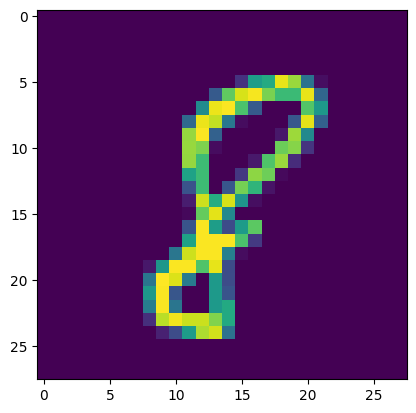

In [78]:
plt.imshow(image.numpy().transpose((1, 2, 0)),)

In [89]:
# patch image 
def patchify(images, n_patches):
    n, c, h, w = images.shape
    
    patches = torch.zeros(n, n_patches ** 2, h*w*c // n_patches ** 2)
    patch_size = h // n_patches
    
    for idx, image in enumerate(images):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = image[:, i * patch_size: (i+1)*patch_size, j * patch_size: (j + 1) * patch_size]
                patches[idx, i*n_patches + j] = patch.flatten()
    
    return patches
    

In [98]:
# model 
class VIT(nn.Module):
    def __init__(self, chw =(1, 28, 28), n_patches=7) -> None:
        super(VIT,self).__init__()
        
        self.chw = chw 
        self.n_patches = n_patches
        self.hidden_d = 8
        
        # linear layer 
        self.input_d  = 16 # 1 x 4 x 4
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)
        
        # learnable classification token
        self.class_token = nn.Parameter(torch(1,self.hidden_d))
    
    def forward(self, images):
        patches = patchify(images, self.n_patches)
        tokens = self.linear_mapper(patches)
        
        # adding classification token
        tokens = torch.stack([torch.vstack((self.class_token, tokens[i])) for i in range(len(tokens))])
        return tokens

In [96]:
model = VIT()